In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv("/content/mnist_train.csv")
test_df = pd.read_csv("/content/mnist_test.csv")

In [4]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.fillna(999, inplace=True)

In [6]:
train_df.shape

(9750, 785)

In [5]:
y=train_df['label']
x=train_df.drop('label',axis=1)

In [7]:
x_for_test_data=test_df[:]

2


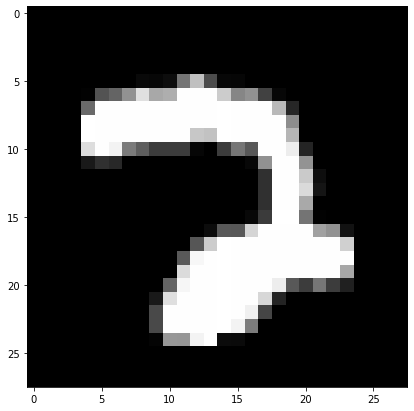

In [8]:
plt.figure(figsize=(7,7))
some_digit=120
some_digit_image = x.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

In [9]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)


In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=1000)
log_classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1000)

In [11]:
y_pred_log=log_classifier.predict(x_test)
y_pred_log

array([1, 6, 0, ..., 9, 8, 3])

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(y_test, y_pred_log))
print(accuracy_score(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       297
           1       0.94      0.96      0.95       336
           2       0.86      0.85      0.85       294
           3       0.83      0.82      0.83       311
           4       0.88      0.91      0.90       274
           5       0.81      0.82      0.81       268
           6       0.94      0.93      0.94       289
           7       0.89      0.91      0.90       319
           8       0.77      0.76      0.76       258
           9       0.88      0.82      0.85       279

    accuracy                           0.88      2925
   macro avg       0.87      0.87      0.87      2925
weighted avg       0.88      0.88      0.88      2925

0.8769230769230769
